### analysis of the reuters dataset

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import ttest_ind    # ttest_ind tests the equality of means
from scipy.stats import chisquare    # chisquare tests the independence of 2 distributions

In [5]:
dfre = pickle.load(open("/home/xhta/Robot/proj/re/pj_dfre_full.20190629_115819.pkl", "rb"))

In [11]:
spa = dfre["npast"].sum()
spr = dfre["npresent"].sum()
sfu = dfre["nfuture"].sum()
sAvepast = spa /(spa + spr + sfu)
sAvepresent = spr / (spa + spr + sfu)
sAvezfuture = sfu / (spa + spr + sfu)

lpa = dfre["nfpast"].sum()
lpr = dfre["nfpresent"].sum()
lfu = dfre["nffuture"].sum()
lAvepast = lpa/ (lpa + lpr + lfu)
lAvepresent = lpr/ (lpa + lpr + lfu)
lAvezfuture = lfu/ (lpa + lpr + lfu)

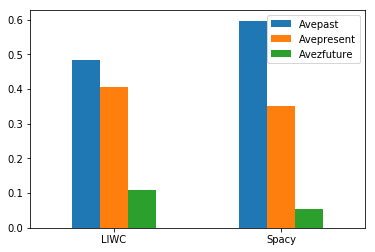

In [12]:
modfplot = pd.DataFrame({'Avepast' : [lAvepast, sAvepast], 'Avepresent': [lAvepresent, sAvepresent], 'Avezfuture': [lAvezfuture, sAvezfuture]}, index =
 ['LIWC', 'Spacy'] )
modfplot.plot.bar(rot=0)
plt.show()

In [8]:
dfre.head()

,cats,tetr,leng,nwords,ntoks,nverbs,npast,npresent,nfuture,nfpast,...,rt,nsents,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
test/14826,[trade],0.0,4605.0,822.0,139.0,100.0,28.0,25.0,3.0,27.0,...,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,32.0,0.500000,0.446429,0.053571,0.415385,0.476923,0.107692,0.0,9.0
test/14828,[grain],0.0,646.0,123.0,23.0,14.0,8.0,2.0,0.0,7.0,...,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,5.0,0.800000,0.200000,0.000000,0.875000,0.125000,0.000000,0.0,0.0
test/14829,"[crude, nat-gas]",0.0,1120.0,199.0,37.0,24.0,7.0,3.0,2.0,7.0,...,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,7.0,0.583333,0.250000,0.166667,0.437500,0.312500,0.250000,0.0,0.0
test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",0.0,938.0,171.0,50.0,16.0,11.0,2.0,0.0,8.0,...,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,8.0,0.846154,0.153846,0.000000,0.888889,0.000000,0.111111,0.0,0.0
test/14833,"[palm-oil, veg-oil]",0.0,1022.0,178.0,40.0,25.0,6.0,5.0,0.0,7.0,...,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,7.0,0.545455,0.454545,0.000000,0.500000,0.357143,0.142857,0.0,2.0


In [13]:
print(sAvepast, sAvepresent, sAvezfuture, lAvepast, lAvepresent, lAvezfuture)

0.5968970180058358 0.3497082058216497 0.05339477617251441 0.4841547528017857 0.40684786554518 0.10899738165303427


In [14]:
# POS tagging, reuters, past tense, present tense, future tense
chisquare([60, 35, 5], [33, 33, 34])
# large t statistics and small p value indicate the observed distribution is not uniform

Power_divergenceResult(statistic=46.94741532976827, pvalue=6.389962233044912e-11)

In [15]:
# LIWC, reuters, past focus, present focus, future focus
chisquare([48, 41, 11], [33, 33, 34])
# large t statistics and small p value indicate the observed distribution is not uniform

Power_divergenceResult(statistic=24.316399286987522, pvalue=5.245187106240977e-06)

In [18]:
ttest_ind(dfre['antpast'], dfre['antpresent'], equal_var = False, nan_policy='omit')
# deliberate use of past, present tenses

Ttest_indResult(statistic=38.56836441489094, pvalue=0.0)

In [19]:
ttest_ind(dfre['antpresent'], dfre['antfuture'], equal_var = False, nan_policy='omit')
# deliberate use of present, future tenses

Ttest_indResult(statistic=85.92888469014095, pvalue=0.0)

In [20]:
# POS vs LIWC   past
ttest_ind(dfre['antpast'], dfre['antfpast'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=11.985163773149372, pvalue=5.416840419023974e-33)

In [21]:
# POS vs LIWC   present
ttest_ind(dfre['antpresent'], dfre['antfpresent'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=-3.7892185814934094, pvalue=0.00015153444120672723)

In [22]:
# POS vs LIWC   future
ttest_ind(dfre['antfuture'], dfre['antffuture'], equal_var = False, nan_policy='omit')

Ttest_indResult(statistic=-21.204115404881243, pvalue=9.29234489958832e-99)